In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Part A: Choosing an Approach

We will go with the Sobel filter for edge detection. Sobel is preferred for its simplicity and effective edge detection along both axes (x and y).

#### Part B: Python Function for Image Filtering

To apply the Sobel filter, we’ll use OpenCV’s cv2.Sobel() function. This function computes the gradients along the x and y directions separately, which can then be combined to get the magnitude of edges.

In [20]:
# Load the image in grayscale
image = cv2.imread('City.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter in x direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in y direction

# Compute the magnitude of gradients
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the result to range 0-255 for visualization
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))


Grayscale is often used for edge detection because we only need intensity values, not color information. Hence why we open the image in grayscale

1, 0: These values specify the direction of the Sobel filter:
- 1: Apply the filter in the x-direction (horizontal edges).
- 0: Do not apply the filter in the y-direction.



Compute the magnitude of gradients
$$sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2) $$
- This step combines the horizontal and vertical gradient results (sobel_x and sobel_y) to compute the overall magnitude of the gradient at each pixel.

Finally, the last art of the code is for noramlziastion
- Normalization: The Sobel filter’s output values can range outside the typical 0-255 intensity range (they can be negative, or greater than 255). To visualize this properly as an image, we normalize the values:


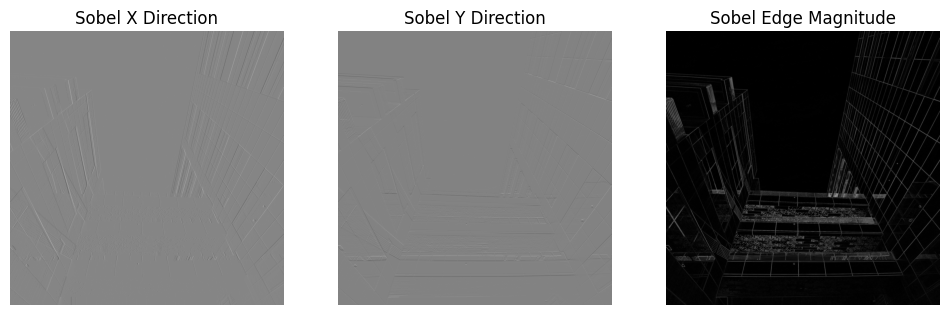

In [22]:
# Display the result
plt.figure(figsize=(12, 8))

# Plot Sobel in X direction
plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X Direction")
plt.axis('off')

# Plot Sobel in Y direction
plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y Direction")
plt.axis('off')

# Plot combined Sobel magnitude
plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Edge Magnitude")
plt.axis('off')

plt.show()

Part C: Exploration and Documentation

Guiding Questions

Filter Type and Size: Sobel filter is a discrete differentiation operator, and we chose a filter size of 3x3 (ksize=3). You can explore other sizes like 5x5 or 7x7 for different effects, though typically 3x3 is common for edge detection.

Edge Handling:Sobel calculates the derivative of the image intensity. In the code, edge handling is managed automatically via the gradient calculation in OpenCV. Sobel can apply different types of border handling using the borderType parameter (e.g., cv2.BORDER_DEFAULT), but the default is usually sufficient.

Values Used: No explicit thresholds were applied. We computed the gradient magnitudes by combining the x and y gradients (sobel_x and sobel_y). This gives a robust result showing the strength of edges.

Visualization:
The visualization involves displaying the Sobel filter’s x-direction, y-direction, and the combined magnitude using grayscale (cmap='gray'). The values are normalized to be in the range 0-255 so that they can be displayed properly.

You can observe how the edges are detected in the x and y directions separately and how combining them results in a more complete edge detection.
